In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cl_df = pd.read_csv('/kaggle/input/heart-disease-data-uci/processed.cleveland.data',header = None)

In [4]:
cl_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
sw_df = pd.read_csv('/kaggle/input/heart-disease-data-uci/processed.switzerland.data',header = None)
sw_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [6]:
hu_df = pd.read_csv('/kaggle/input/heart-disease-data-uci/processed.hungarian.data',header = None)
hu_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [7]:
va_df = pd.read_csv('/kaggle/input/heart-disease-data-uci/processed.va.data',header = None)
va_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [8]:
df = pd.concat([cl_df,sw_df,hu_df,va_df],axis = 0,ignore_index = True)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       920 non-null    float64
 1   1       920 non-null    float64
 2   2       920 non-null    float64
 3   3       920 non-null    object 
 4   4       920 non-null    object 
 5   5       920 non-null    object 
 6   6       920 non-null    object 
 7   7       920 non-null    object 
 8   8       920 non-null    object 
 9   9       920 non-null    object 
 10  10      920 non-null    object 
 11  11      920 non-null    object 
 12  12      920 non-null    object 
 13  13      920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 100.8+ KB


In [11]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [12]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [13]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      920 non-null    float64
 1   sex      920 non-null    float64
 2   cp       920 non-null    float64
 3   restbp   920 non-null    object 
 4   chol     920 non-null    object 
 5   fbs      920 non-null    object 
 6   restecg  920 non-null    object 
 7   thalach  920 non-null    object 
 8   exang    920 non-null    object 
 9   oldpeak  920 non-null    object 
 10  slope    920 non-null    object 
 11  ca       920 non-null    object 
 12  thal     920 non-null    object 
 13  hd       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 100.8+ KB


In [15]:
df['restbp'] = df['restbp'].replace('?',np.nan)

In [16]:
df['chol'] = df['chol'].replace('?',np.nan)

In [17]:
df['fbs'] = df['fbs'].replace('?',np.nan)

In [18]:
df['restecg'] = df['restecg'].replace('?',np.nan)

In [19]:
df['thalach'] = df['thalach'].replace('?',np.nan)

In [20]:
df['exang'] = df['exang'].replace('?',np.nan)

In [21]:
df['oldpeak'] = df['oldpeak'].replace('?',np.nan)

In [22]:
df['slope'] = df['slope'].replace('?',np.nan)

In [23]:
df['ca'] = df['ca'].replace('?',np.nan)

In [24]:
df['thal'] = df['thal'].replace('?',np.nan)

In [25]:
df['hd'].value_counts()

hd
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [26]:
df.isnull().sum()

age          0
sex          0
cp           0
restbp      59
chol        30
fbs         90
restecg      2
thalach     55
exang       55
oldpeak     62
slope      309
ca         611
thal       486
hd           0
dtype: int64

In [27]:
df['restbp'] = df['restbp'].astype(np.float64)

In [28]:
df['restbp'].bfill(inplace = True)

In [29]:
df['chol'] = df['chol'].astype(np.float64)

In [30]:
df['chol'].bfill(inplace = True)

In [31]:
df['fbs'] = df['fbs'].astype(np.float64)

In [32]:
df['fbs'].bfill(inplace = True)

In [33]:
df['restecg'] = df['restecg'].astype(np.float64)

In [34]:
df['restecg'].bfill(inplace = True)

In [35]:
df['thalach'] = df['thalach'].astype(np.float64)

In [36]:
df['thalach'].bfill(inplace = True)

In [37]:
df['exang'] = df['exang'].astype(np.float64)

In [38]:
df['exang'].bfill(inplace = True)

In [39]:
df['oldpeak'] = df['oldpeak'].astype(np.float64)

In [40]:
df['oldpeak'].bfill(inplace = True)

In [41]:
df['slope'] = df['slope'].astype(np.float64)

In [42]:
df['slope'].ffill(inplace = True)

In [43]:
df['ca'] = df['ca'].astype(np.float64)

In [44]:
df['ca'].bfill(inplace = True)

In [45]:
df['ca'].ffill(inplace = True)

In [46]:
df['thal'] = df['thal'].astype(np.float64)

In [47]:
df['thal'].bfill(inplace = True)

In [48]:
df['thal'].ffill(inplace = True)

In [49]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Dataset Description
Only 14 attributes used:
1.  (age)   Integer    
2.  (sex)   Categorical    sex (1 = male; 0 = female)
3.  (cp)    Categorical chest pain type
            -- Value 1: typical angina
            -- Value 2: atypical angina
            -- Value 3: non-anginal pain
            -- Value 4: asymptomatic  
4.  (restbp)  Integer  resting blood pressure (in mm Hg on admission to the hospital)
5.  (chol)      Integer  serum cholestoral in mg/dl
6.  (fbs)       Categorical (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7.  (restecg)   Categorical resting electrocardiographic results
            -- Value 0: normal
            -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
            -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.  (thalach)   Integer maximum heart rate achieved
9.  (exang)     Categorical exercise induced angina (1 = yes; 0 = no)
10. (oldpeak)   Integer ST depression induced by exercise relative to rest
11. (slope)     Categorical  the slope of the peak exercise ST segment
            -- Value 1: upsloping
            -- Value 2: flat
            -- Value 3: downsloping
12. (ca)        Integer number of major vessels (0-3) colored by flourosopy
13. (thal)      Categorical 
                3 = normal; 6 = fixed defect; 7 = reversable defect
14. (hd)       (the predicted attribute) Integer 
            -- Value 0
            -- Value 1
            -- Value 2
            -- Value 3
            -- Value 4

In [50]:
X = df.drop(columns = 'hd',axis = 1)
y = df['hd']

In [51]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [52]:
# Split the data into training (70%), validation (15%), testing (15%)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=101)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_train.loc[:,['age','restbp','chol','thalach','oldpeak','ca']] = scaler.fit_transform(X_train.loc[:,['age','restbp','chol','thalach','oldpeak','ca']])

In [55]:
X_test.loc[:,['age','restbp','chol','thalach','oldpeak','ca']] = scaler.transform(X_test.loc[:,['age','restbp','chol','thalach','oldpeak','ca']])

In [56]:
X_val.loc[:,['age','restbp','chol','thalach','oldpeak','ca']] = scaler.transform(X_val.loc[:,['age','restbp','chol','thalach','oldpeak','ca']])

In [57]:
def model_accuracy_conf_clf(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import classification_report,accuracy_score
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    clf_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    print(clf_report,"\n","Accuracy Score: ",round(accuracy_score(y_test, y_pred)*100,2))    

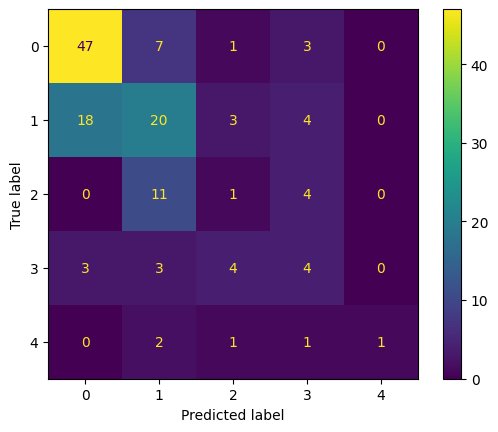

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        58
           1       0.47      0.44      0.45        45
           2       0.10      0.06      0.08        16
           3       0.25      0.29      0.27        14
           4       1.00      0.20      0.33         5

    accuracy                           0.53       138
   macro avg       0.50      0.36      0.38       138
weighted avg       0.52      0.53      0.51       138
 
 Accuracy Score:  52.9


In [58]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(max_iter=1000)
model_accuracy_conf_clf(LogR,X_train,y_train,X_test,y_test)

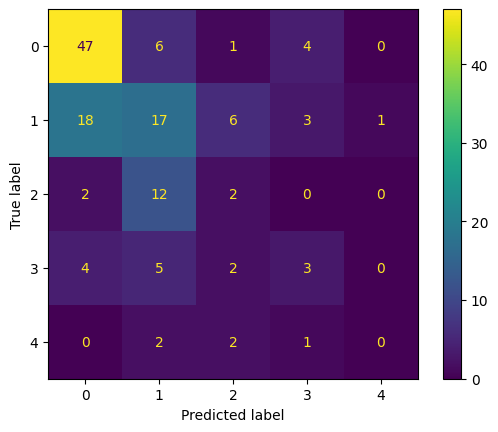

              precision    recall  f1-score   support

           0       0.66      0.81      0.73        58
           1       0.40      0.38      0.39        45
           2       0.15      0.12      0.14        16
           3       0.27      0.21      0.24        14
           4       0.00      0.00      0.00         5

    accuracy                           0.50       138
   macro avg       0.30      0.31      0.30       138
weighted avg       0.46      0.50      0.47       138
 
 Accuracy Score:  50.0


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100)
model_accuracy_conf_clf(rf_clf,X_train,y_train,X_test,y_test)

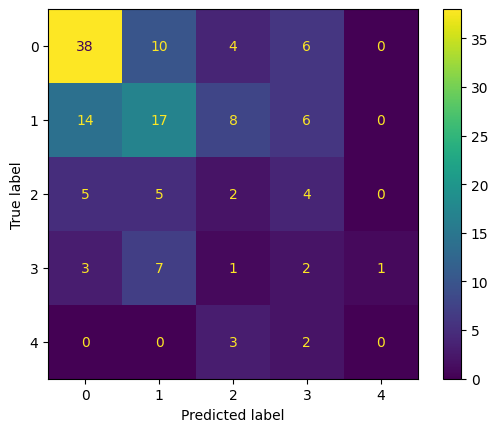

              precision    recall  f1-score   support

           0       0.63      0.66      0.64        58
           1       0.44      0.38      0.40        45
           2       0.11      0.12      0.12        16
           3       0.10      0.14      0.12        14
           4       0.00      0.00      0.00         5

    accuracy                           0.43       138
   macro avg       0.26      0.26      0.26       138
weighted avg       0.43      0.43      0.43       138
 
 Accuracy Score:  42.75


In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
model_accuracy_conf_clf(dt_clf,X_train,y_train,X_test,y_test)

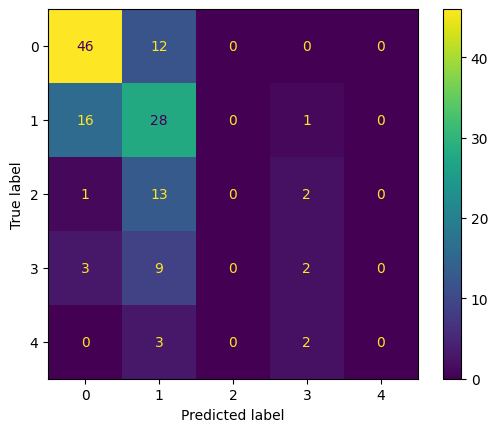

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        58
           1       0.43      0.62      0.51        45
           2       0.00      0.00      0.00        16
           3       0.29      0.14      0.19        14
           4       0.00      0.00      0.00         5

    accuracy                           0.55       138
   macro avg       0.28      0.31      0.29       138
weighted avg       0.46      0.55      0.50       138
 
 Accuracy Score:  55.07


In [61]:
from sklearn.svm import SVC
svc_clf = SVC()
model_accuracy_conf_clf(svc_clf,X_train,y_train,X_test,y_test)

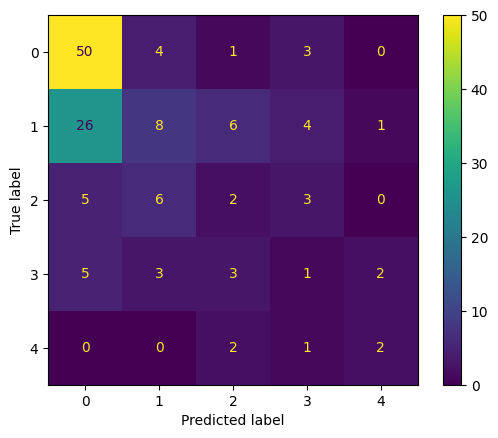

              precision    recall  f1-score   support

           0       0.58      0.86      0.69        58
           1       0.38      0.18      0.24        45
           2       0.14      0.12      0.13        16
           3       0.08      0.07      0.08        14
           4       0.40      0.40      0.40         5

    accuracy                           0.46       138
   macro avg       0.32      0.33      0.31       138
weighted avg       0.41      0.46      0.41       138
 
 Accuracy Score:  45.65


In [62]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME.R", random_state=0)
model_accuracy_conf_clf(ada_clf,X_train,y_train,X_test,y_test)

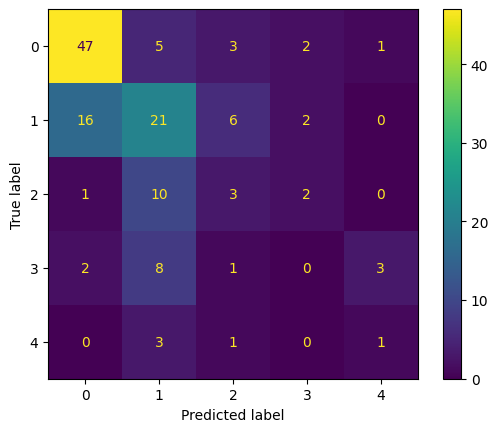

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        58
           1       0.45      0.47      0.46        45
           2       0.21      0.19      0.20        16
           3       0.00      0.00      0.00        14
           4       0.20      0.20      0.20         5

    accuracy                           0.52       138
   macro avg       0.31      0.33      0.32       138
weighted avg       0.48      0.52      0.50       138
 
 Accuracy Score:  52.17


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model_accuracy_conf_clf(grad_clf,X_train,y_train,X_test,y_test)

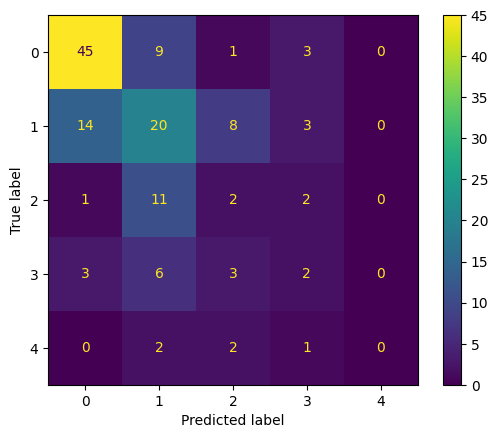

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        58
           1       0.42      0.44      0.43        45
           2       0.12      0.12      0.12        16
           3       0.18      0.14      0.16        14
           4       0.00      0.00      0.00         5

    accuracy                           0.50       138
   macro avg       0.29      0.30      0.29       138
weighted avg       0.47      0.50      0.48       138
 
 Accuracy Score:  50.0


In [64]:
import xgboost as xgb
xg_clf = xgb.XGBClassifier()
model_accuracy_conf_clf(xg_clf,X_train,y_train,X_test,y_test)